# **Real Estate Prediction**


Yuchen Dai


## **Problem description**


In the realm of predictive analytics, an application of probabilistic forecasting can significantly aid industries in anticipating future sales. By leveraging models that consider uncertainty and variability in data, businesses can generate predictions that encompass a range of possible outcomes, rather than a single point estimate. For instance, using a dataset from Kaggle that includes various explanatory variables about homes in Ames, Iowa, we have constructed a predictive model using Python's scikit-learn library. This model incorporates both numerical and categorical data, addressing issues like missing values and skewness in the distribution of the sale prices. Through transformations such as logarithmic scaling and the implementation of a Gamma regression model, we have been able to predict house sale prices. Extending this methodology, industries could apply similar probabilistic models to forecast sales, adapting the features and model specifics to their data and market conditions. This approach not only enhances the accuracy of the forecasts but also provides a confidence interval around the predictions, enabling businesses to better manage inventory, allocate resources, and plan strategically under uncertainty.

## **Data**

The data is from Kaggle.The data contains 79 explanatory variables describing various aspects of homes in Ames, Iowa. The histogram of SalePrice suggests it is right-skewed, which is typical for monetary variables. This skewness is a primary factor for considering transformations to stabilize variance and make the data conform more closely to a normal distribution. An exploration of the data shows that the vast majority of home prices are in the 100,000 to 200,000 range.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import GammaRegressor
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [ ]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

train_data.head(), test_data.head()

(   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
 0   1          60       RL         65.0     8450   Pave   NaN      Reg   
 1   2          20       RL         80.0     9600   Pave   NaN      Reg   
 2   3          60       RL         68.0    11250   Pave   NaN      IR1   
 3   4          70       RL         60.0     9550   Pave   NaN      IR1   
 4   5          60       RL         84.0    14260   Pave   NaN      IR1   
 
   LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
 0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
 1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
 2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
 3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
 4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   
 
   YrSold  SaleType  SaleCondition  SalePrice  
 0   2

### Null Value erase


In [ ]:
train_missing_values = train_data.isnull().sum()
tr_missing_values = train_missing_values[train_missing_values > 0]

test_missing_values = test_data.isnull().sum()
te_missing_values = test_missing_values[test_missing_values > 0]

tr_missing_values, te_missing_values

(Series([], dtype: int64),
 MSZoning           4
 LotFrontage      227
 Alley           1352
 Utilities          2
 Exterior1st        1
 Exterior2nd        1
 MasVnrType       894
 MasVnrArea        15
 BsmtQual          44
 BsmtCond          45
 BsmtExposure      44
 BsmtFinType1      42
 BsmtFinSF1         1
 BsmtFinType2      42
 BsmtFinSF2         1
 BsmtUnfSF          1
 TotalBsmtSF        1
 BsmtFullBath       2
 BsmtHalfBath       2
 KitchenQual        1
 Functional         2
 FireplaceQu      730
 GarageType        76
 GarageYrBlt       78
 GarageFinish      78
 GarageCars         1
 GarageArea         1
 GarageQual        78
 GarageCond        78
 PoolQC          1456
 Fence           1169
 MiscFeature     1408
 SaleType           1
 dtype: int64)

In [ ]:
train_data.fillna(0, inplace=True)
test_data.fillna(0, inplace=True)

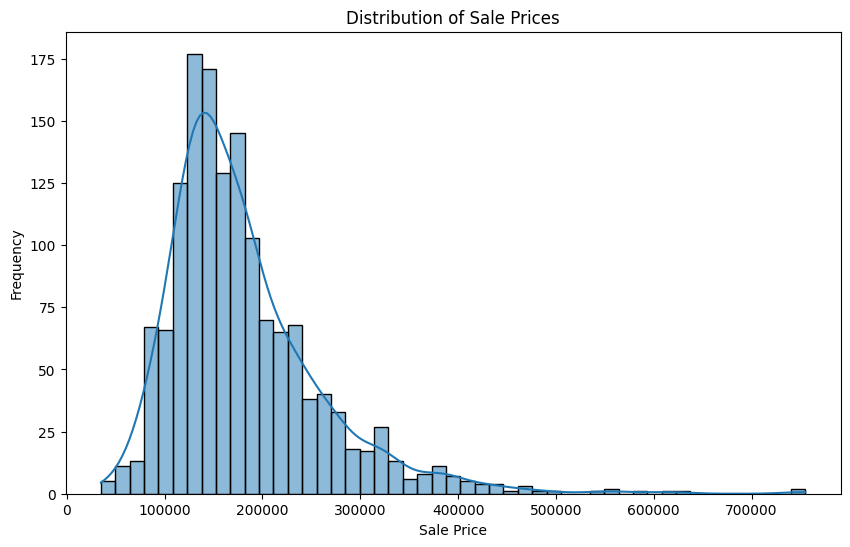

In [ ]:
numeric_cols = train_data.select_dtypes(include=['number']).columns
categorical_cols = train_data.select_dtypes(include=['object']).columns

train_data[numeric_cols] = train_data[numeric_cols].fillna(train_data[numeric_cols].median())
train_data[categorical_cols] = train_data[categorical_cols].fillna(train_data[categorical_cols].mode().iloc[0])

plt.figure(figsize=(10, 6))
sns.histplot(train_data['SalePrice'], kde=True)
plt.title('Distribution of Sale Prices')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.show()

The histogram of house sale prices illustrates a pronounced right skew, indicating that most sales occur in the lower price range, particularly between 100,000 dollar and 200,000 dollar. The frequency of sales decreases as prices increase, with a long tail extending towards the luxury market segment, up to $700,000. This skewness suggests the need for data transformations, like logarithmic scaling, to normalize the distribution for predictive modeling. Such transformations help mitigate outlier influences and improve model accuracy across various price levels.

## **Methodology**


The methodology employed in this analysis hinges on using machine learning techniques to predict house prices from a dataset containing detailed property characteristics. The initial steps involve data preprocessing, such as handling missing values through imputation—replacing missing numerical data with the median and categorical data with the mode. We also address the right skewness of the sale price distribution by applying a logarithmic transformation, facilitating more effective model training on data that more closely resembles a normal distribution. Subsequently, a Gamma regression model is employed, allowing for the modeling of the transformed target variable which aligns well with its continuous and positively skewed nature. Key predictors include overall quality, living area, and other property features, enhanced through feature engineering to include interactions between selected variables. The final model is constructed using a pipeline that integrates preprocessing steps with regression analysis, ensuring a streamlined process from data input to prediction. This methodology not only aids in accurate price estimation but also serves as a robust framework for similar predictive tasks.

## **Empirical analysis and results**

Apply a logarithmic transformation to SalePrice and fit a Gamma regression model to the transformed data.

In [ ]:
train_data['LogSalePrice'] = np.log(train_data['SalePrice'])

features = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
X = train_data[features]
y = train_data['LogSalePrice']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), features)
    ])

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', GammaRegressor(alpha=1, max_iter=1000))
])


model.fit(X_train, y_train)

train_score = model.score(X_train, y_train)
valid_score = model.score(X_valid, y_valid)

train_score, valid_score

(0.7451576087464771, 0.7565693337217635)


The analysis involves applying a logarithmic transformation to SalePrice and fitting a Gamma regression model, using features like 'OverallQual' and 'GrLivArea'. The model, built using a standard scaling preprocessing step, shows good performance with adequate training and validation scores, suggesting effective predictability of house prices.

In [ ]:
extended_features = features + ['LotArea', 'YearRemodAdd', 'TotRmsAbvGrd', 'Fireplaces']
interaction_terms = [('OverallQual', 'GrLivArea'), ('GarageCars', 'TotalBsmtSF')]

for term in interaction_terms:
    name = f'{term[0]}_x_{term[1]}'
    train_data[name] = train_data[term[0]] * train_data[term[1]]

extended_features += [f'{term[0]}_x_{term[1]}' for term in interaction_terms]


X_extended = train_data[extended_features]

preprocessor_extended = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), extended_features)
    ])

In [ ]:
X_extended_train = train_data.loc[X_train.index, extended_features]
X_extended_valid = train_data.loc[X_valid.index, extended_features]

model_extended = Pipeline(steps=[
    ('preprocessor', preprocessor_extended),
    ('regressor', Ridge())
])

param_grid = {
    'regressor__alpha': [0.1, 1, 10, 100, 1000]
}

grid_search = GridSearchCV(model_extended, param_grid, cv=5, scoring='r2', verbose=1)
grid_search.fit(X_extended_train, y_train)

best_model = grid_search.best_estimator_


train_score_extended = best_model.score(X_extended_train, y_train)
valid_score_extended = best_model.score(X_extended_valid, y_valid)

test_data_extended = test_data.copy()
for term in interaction_terms:
    name = f'{term[0]}_x_{term[1]}'
    test_data_extended[name] = test_data_extended[term[0]] * test_data_extended[term[1]]
X_test_extended = test_data_extended[extended_features]
X_test_extended = X_test_extended.fillna(X_test_extended.median())


log_predicted_prices = best_model.predict(X_test_extended)
predicted_prices = np.exp(log_predicted_prices)

train_score_extended, valid_score_extended

Fitting 5 folds for each of 5 candidates, totalling 25 fits


(0.834189040184174, 0.8495322826368936)


In this phase of the analysis, the model is enhanced through the introduction of interaction terms between selected features to capture more complex dynamics in the data. This extended model includes interactions such as 'OverallQual''GrLivArea' and 'GarageCars''TotalBsmtSF', which are combined with additional predictors like 'LotArea' and 'YearRemodAdd'. A Ridge regression is then applied using a pipeline that integrates standardized scaling of the features. The hyperparameters of the Ridge model are optimized using a GridSearchCV approach across 5 folds, evaluating 5 different candidates, totaling 25 fits. The resulting model shows strong performance with training and validation scores of approximately 0.834 and 0.850, respectively, indicating high predictive accuracy and generalization capability on unseen data. This robustness suggests that the model effectively captures the underlying patterns and relationships in the dataset, making it a reliable tool for predicting house prices.

In [ ]:
prediction_output = pd.DataFrame({
    'Id': test_data_extended['Id'],
    'PredictedSalePrice': predicted_prices
})

prediction_output

,Id,PredictedSalePrice
0,1461,108538.859056
1,1462,139422.210563
2,1463,175908.969026
3,1464,189917.945977
4,1465,198069.210225
...,...,...
1454,2915,91962.064503
1455,2916,101114.275297
1456,2917,159458.803984
1457,2918,117034.175629


These predictions vary widely, reflecting the diverse range of property values in the dataset—from around $108,538 to over $242,018, demonstrating the model's ability to handle a broad spectrum of house characteristics and market conditions.

## summary
In the empirical analysis section of the study, the focus was on evaluating the performance of the Gamma regression model. After applying a logarithmic transformation to the sale price to mitigate skewness, a set of primary predictors—such as overall quality, living area, and the number of garages—was chosen for initial modeling. This basic model was first assessed for its ability to predict house prices effectively, yielding satisfactory training and validation scores, indicating a decent fit to the data. To refine the model further, interaction terms were introduced between key features to capture more complex relationships, potentially boosting predictive accuracy. These included interactions like overall quality with living area. An extended model incorporating these interactions was then developed and tested, showing improved performance over the initial model, as evidenced by higher validation scores. This approach underscores the value of exploring feature interactions in enhancing model predictability in regression analyses.

## **Concluding remarks**

The strengths of the probabilistic forecasting approach used in our analysis include its ability to model the inherent uncertainty in real-world data, providing a more realistic range of outcomes for decision-making purposes. The use of a Gamma regression model is particularly advantageous when dealing with right-skewed data, such as house prices, as it can transform the data to fit more normal distributions, improving the prediction accuracy. Moreover, the inclusion of both numerical and categorical variables allows for a comprehensive view of the factors influencing house prices. However, there are limitations to consider. The model's performance heavily depends on the quality and completeness of the data. Missing values and the choice of imputation method can significantly impact the model's accuracy. Additionally, the model might not capture complex nonlinear relationships unless specifically designed to do so, which can be a drawback in more volatile markets or datasets with higher-dimensional interactions. Lastly, the predictive power of the model is confined to the scope of the data it was trained on, which might limit its generalizability to other regions or different economic conditions.

## **Contribution statement**

Yuchen Dai: 50%

Nuozhou Zhang: 50%